In [4]:
from Linearization.Linearization import LinearFitter
from Geometrical.Geometrical import GeometricalFitter
from Polynomial.Polynomial import PolynomialFitter
from GBDT.GBDT import GBDTFitter
from Database import PanelDataBase

from Vector import Vector

import numpy as np
import pandas as pd

from sklearn.model_selection import GridSearchCV

In [ ]:
# linear = LinearFitter()
# geom = GeometricalFitter()
# poly = PolynomialFitter()
# database = PanelDataBase()
# panels = [database.panel_list[3], database.panel_list[10], database.panel_list[22]]
# bad_panels = database.bad_panels_list
 

NameError: name 'GBDTFitter' is not defined

In [5]:
gbdt = GBDTFitter()
panels = gbdt.data_base.panel_list[2::2]

# x_grid = GridSearchCV(gbdt.x_regressor, gbdt.hyper_params, cv=3, scoring='neg_mean_squared_error')
# y_grid = GridSearchCV(gbdt.y_regressor, gbdt.hyper_params, cv=3, scoring='neg_mean_squared_error')


# features = gbdt.data_base[panels[0]].initial_data.loc[:, ["x_light", "y_light"]]

# x_grid.fit(features, gbdt.data_base[panels[0]].initial_data["X"])
# print(x_grid.best_params_)

Database target directory:  /home/nikolai/Yandex.Disk/diploma/Data


{'learning_rate': 0.08, 'max_depth': 3, 'n_estimators': 400, 'reg_lambda': 1}

In [6]:
train_frame = gbdt.perform_training(panels[0])
test_frame = gbdt.perform_testing(panels[0])
X_boosted = test_frame["X_boosted"]
Y_boosted = test_frame["Y_boosted"]
X = test_frame["X"]
Y = test_frame["Y"]

In [7]:
from Plotting import ResearchPlotter as Plotter

Database target directory:  /home/nikolai/Yandex.Disk/diploma/Data


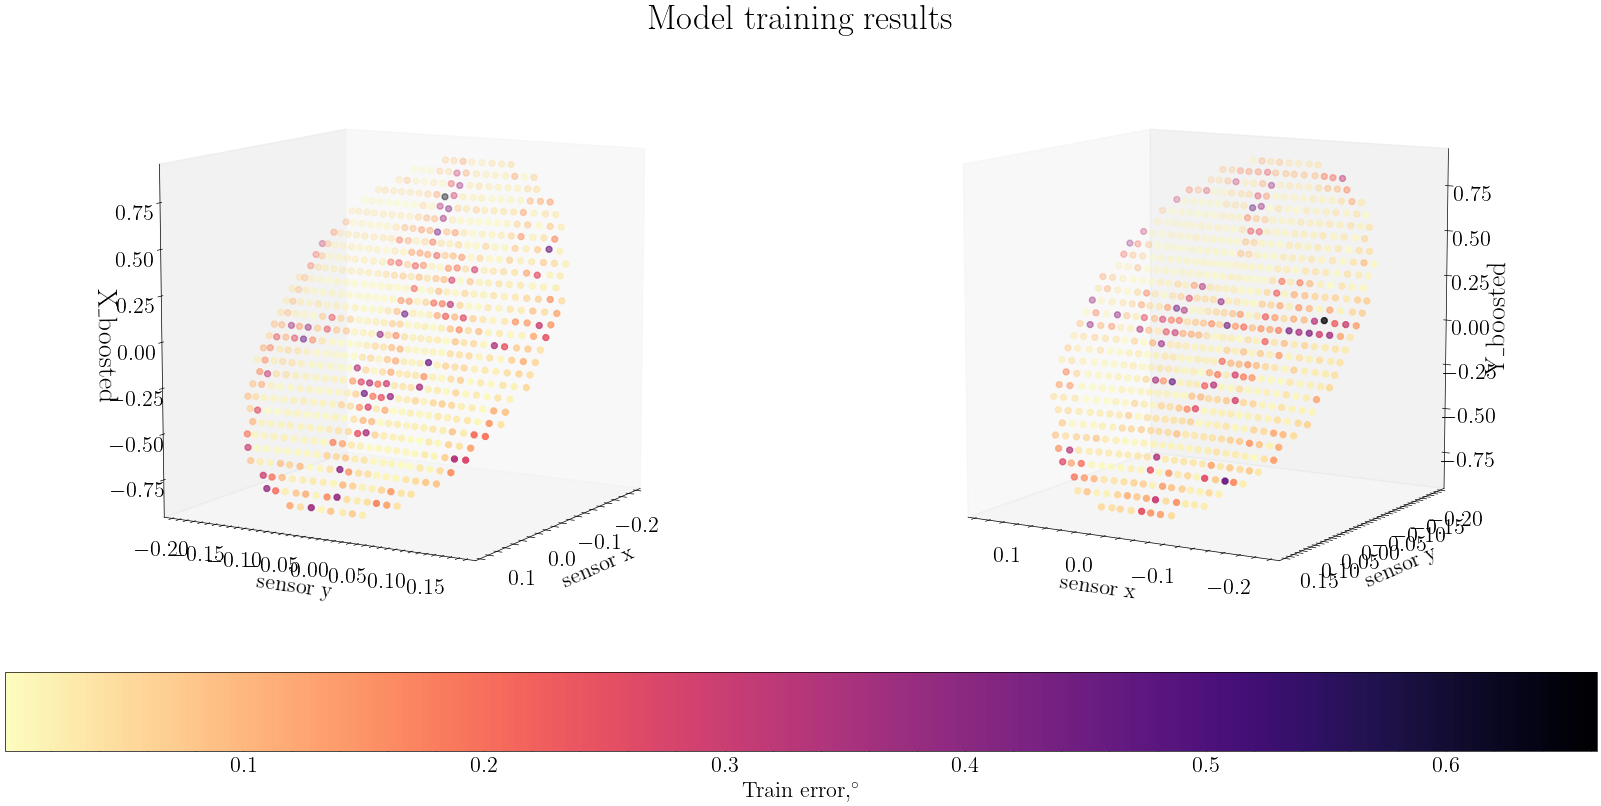

In [8]:
Plotter.plot_model_training_results(panels[0], train_frame, "X_boosted", "Y_boosted", animation_path=None)

In [9]:

errors = np.array(
            [
                Vector.angle_between_vectors(Vector(X[i], Y[i]), Vector(X_boosted[i], Y_boosted[i]))
                for i in range(X.shape[0])
            ]           
        )
print(f"Mean error: {errors.mean()}")
print(f"Error std: {errors.std()}")

Mean error: 1.7175183161505834
Error std: 0.8225985029604822


In [7]:
# linear.exec()
# geom.exec()
# poly.exec()
# gbdt.exec()

In [8]:
linear.make_calibration_statistics()
geom.make_calibration_statistics()
poly.make_calibration_statistics()
gbdt.make_calibration_statistics()


NameError: name 'linear' is not defined

In [ ]:
from Plotting import ResearchPlotter as Plotter

Database target directory:  /home/kolya/Yandex.Disk/diploma/Data


In [ ]:
# linear_errors = pd.read_csv("/home/kolya/Yandex.Disk/diploma/Sources/Linearization/error_stats.csv", index_col=["Panel", "Measurement"])
# linear_stats = pd.read_csv("/home/kolya/Yandex.Disk/diploma/Sources/Linearization/stats.csv")

# poly_errors = pd.read_csv("/home/kolya/Yandex.Disk/diploma/Sources/Polynomial/error_stats.csv", index_col=["Panel", "Measurement"])
# poly_stats = pd.read_csv("/home/kolya/Yandex.Disk/diploma/Sources/Polynomial/stats.csv")

# geom_errors = pd.read_csv("/home/kolya/Yandex.Disk/diploma/Sources/Geometrical/error_stats.csv", index_col=["Panel", "Measurement"])
# geom_stats = pd.read_csv("/home/kolya/Yandex.Disk/diploma/Sources/Geometrical/stats.csv")


In [ ]:
# Plotter.plot_error_colormesh(panels[0], linear_errors, "angle_error_linearized")

In [ ]:
# Plotter.plot_error_colormesh(panels[0], poly.errors_dataframe,"angle_error_cube")

In [ ]:
# Plotter.plot_error_colormesh(panels[0], geom.errors_dataframe, "angle_error_linear_offsets")

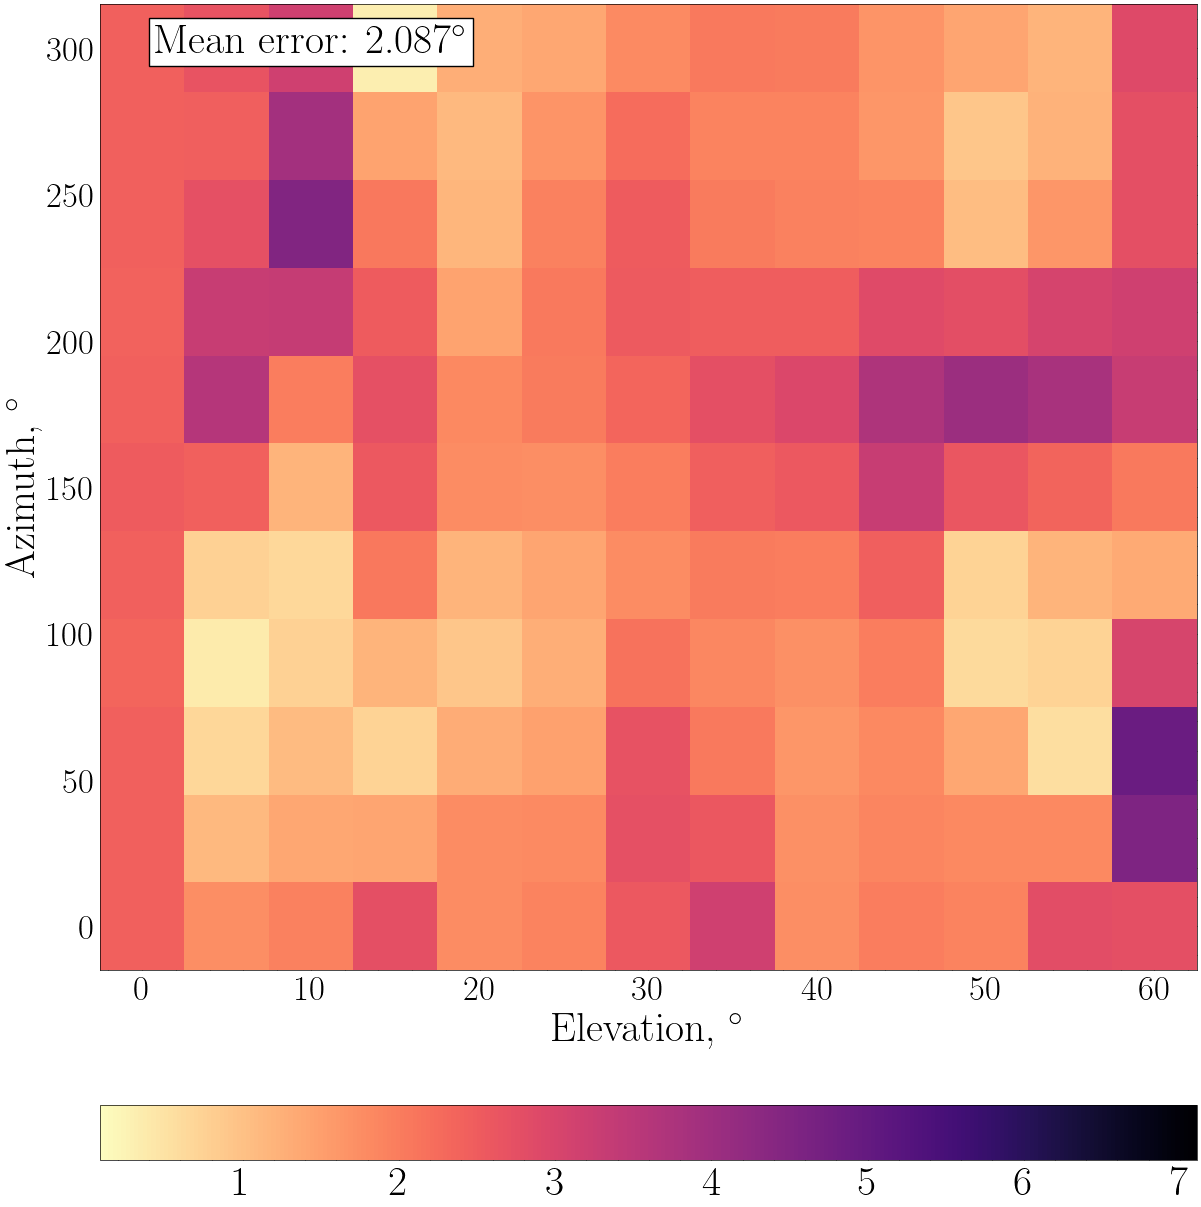

In [ ]:
# Plotter.plot_error_colormesh(panels[1], gbdt.errors_dataframe, "angle_error_boosted")

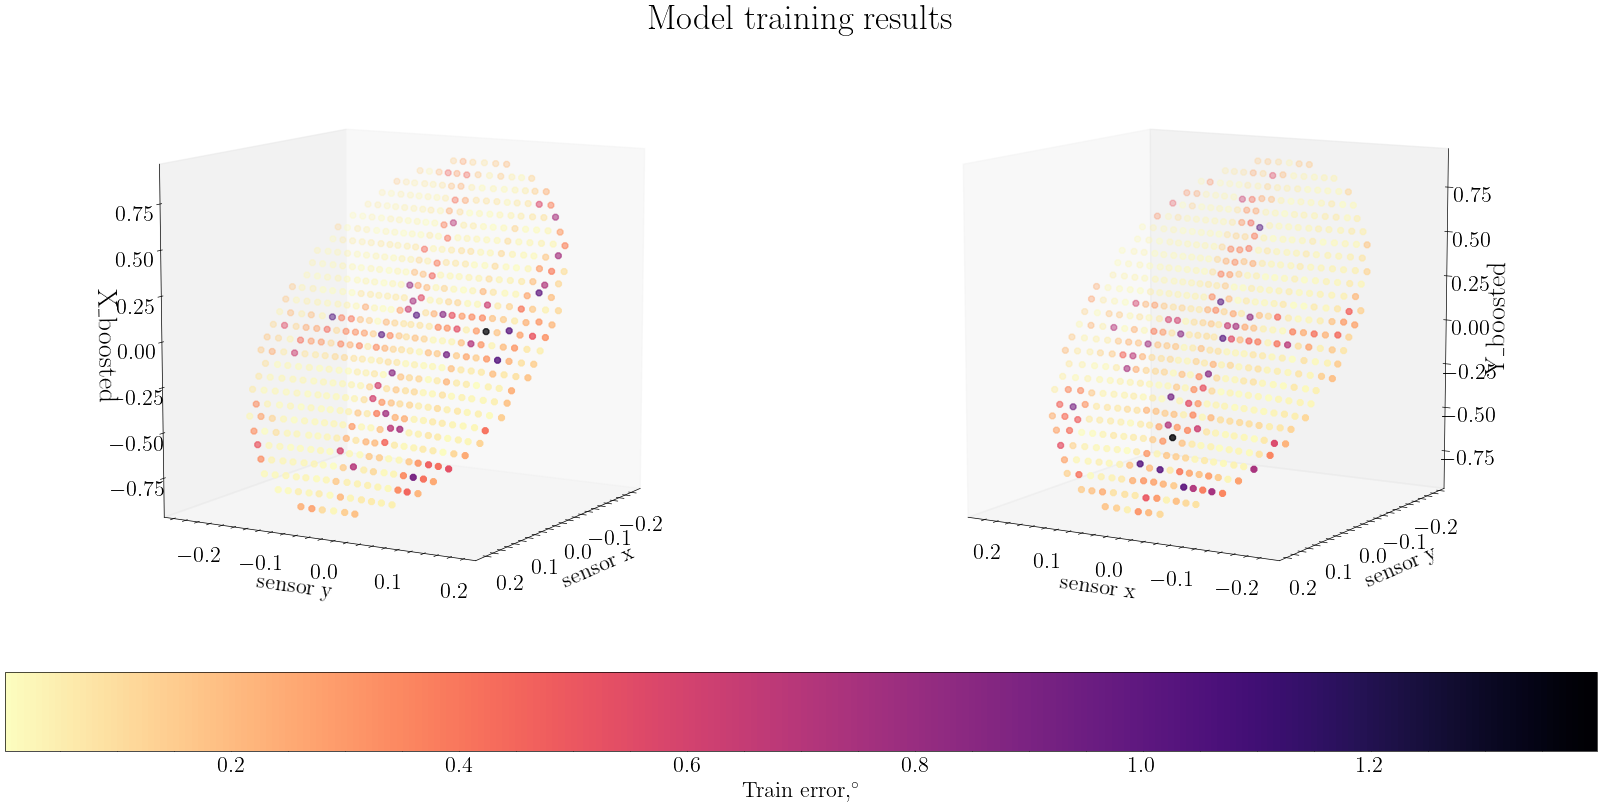

In [ ]:
# Plotter.plot_model_training_results(panels[0], gbdt.perform_training(panels[0]), "X_boosted", "Y_boosted", animation_path="../Pictures/train_results_gbdt_g01_0007.gif")

In [ ]:
# Plotter.plot_error_fov_statistics(panels[0], poly_errors, "angle_error_cube")

In [ ]:
# Plotter.plot_model_training_results(panels[0], poly.perform_training(panels[0]), "X_cube", "Y_cube", animation_path="../Pictures/train_results_poly_g01_0007.gif")

In [ ]:
# Plotter.plot_overall_model_stability_histogram(panels[0], poly_stats, ("mean_error_sq", "standart_deviation_sq"), ("mean_error_cube", "standart_deviation_cube"), ("mean_error_quad", "standart_deviation_quad"))

In [ ]:
# Plotter.plot_overall_model_stability_histogram(panels[0], linear_stats, ("mean_error_linearized", "standart_deviation_linearized"))

In [ ]:
# Plotter.plot_overall_model_stability_histogram(panels[0], geom_stats, ("mean_error_unbiased", "standart_deviation_unbiased"), ("mean_error_linear_offsets", "standart_deviation_linear_offsets"), ("mean_error_all_offsets", "standart_deviation_all_offsets"))

In [ ]:
Plotter.plot_single_dataset_error_distribution(panels[0], (linear_errors, geom_errors, poly_errors), ("angle_error_linearized",), ("angle_error_unbiased", "angle_error_linear_offsets", "angle_error_all_offsets"), ("angle_error_sq", "angle_error_cube", "angle_error_quad"))

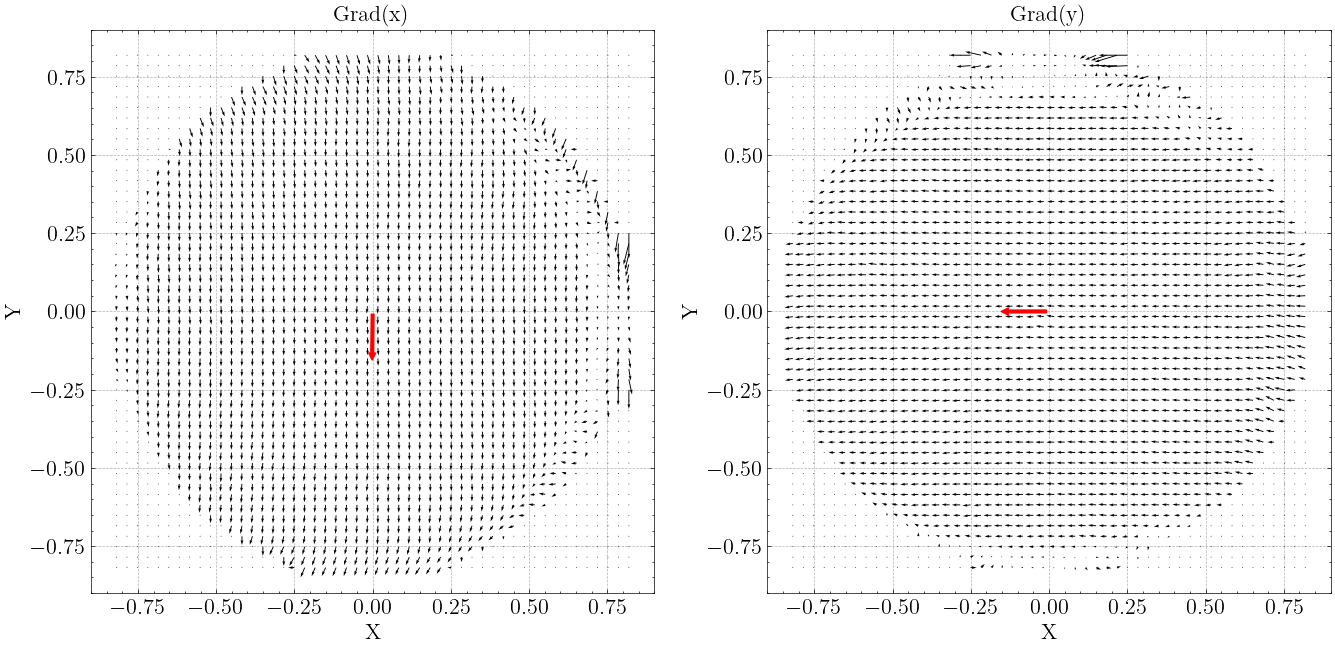

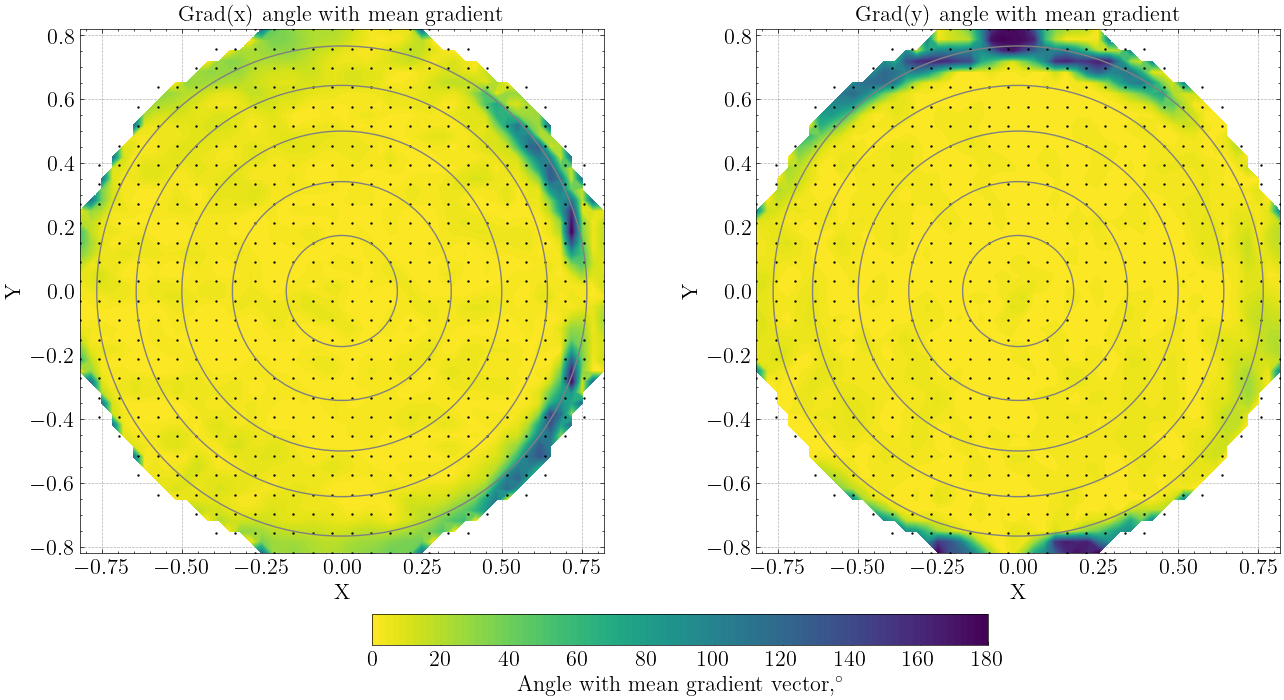

In [ ]:
# Plotter.plot_light_gradient(Plotter.data_base[bad_panels[0]].initial_data)

In [ ]:
# Plotter.plot_initial_data(bad_panels[0], "../Pictures/initial_data_g01_0002.gif")

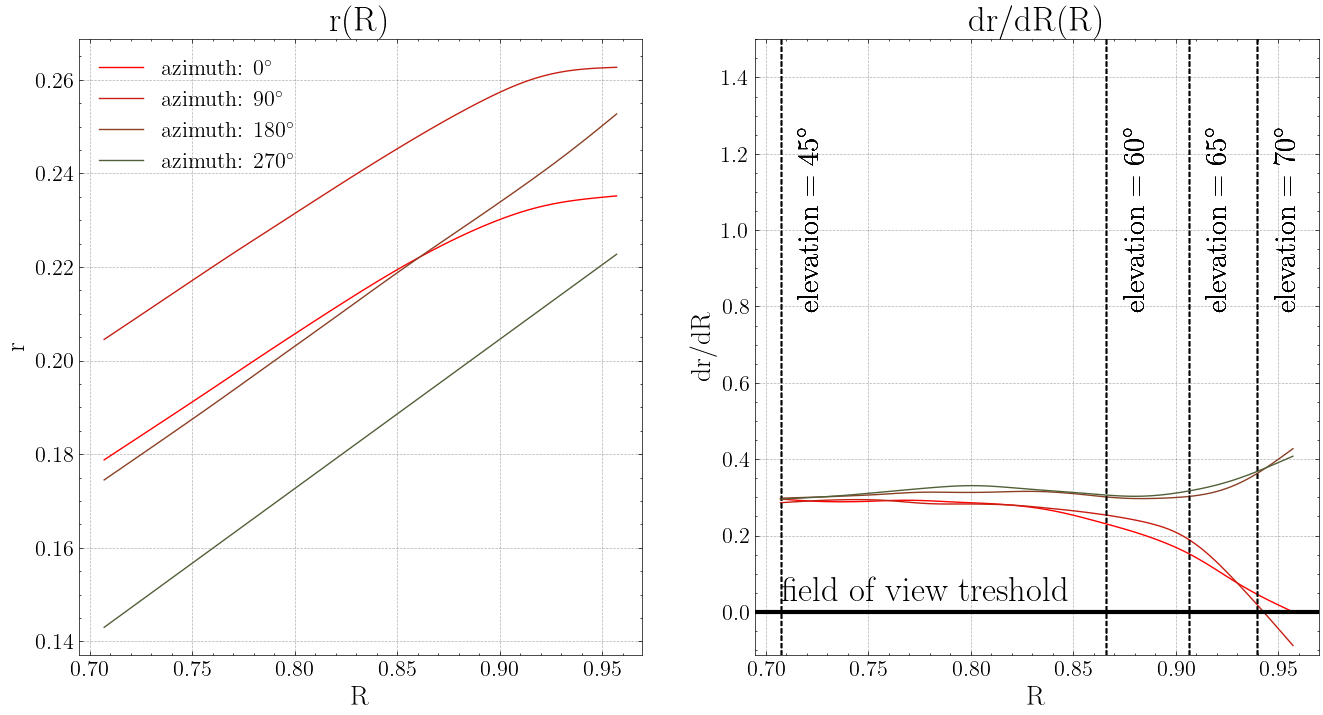

In [ ]:
# Plotter.plot_fov_preestimation(Plotter.data_base[panels[0]].fov_data)

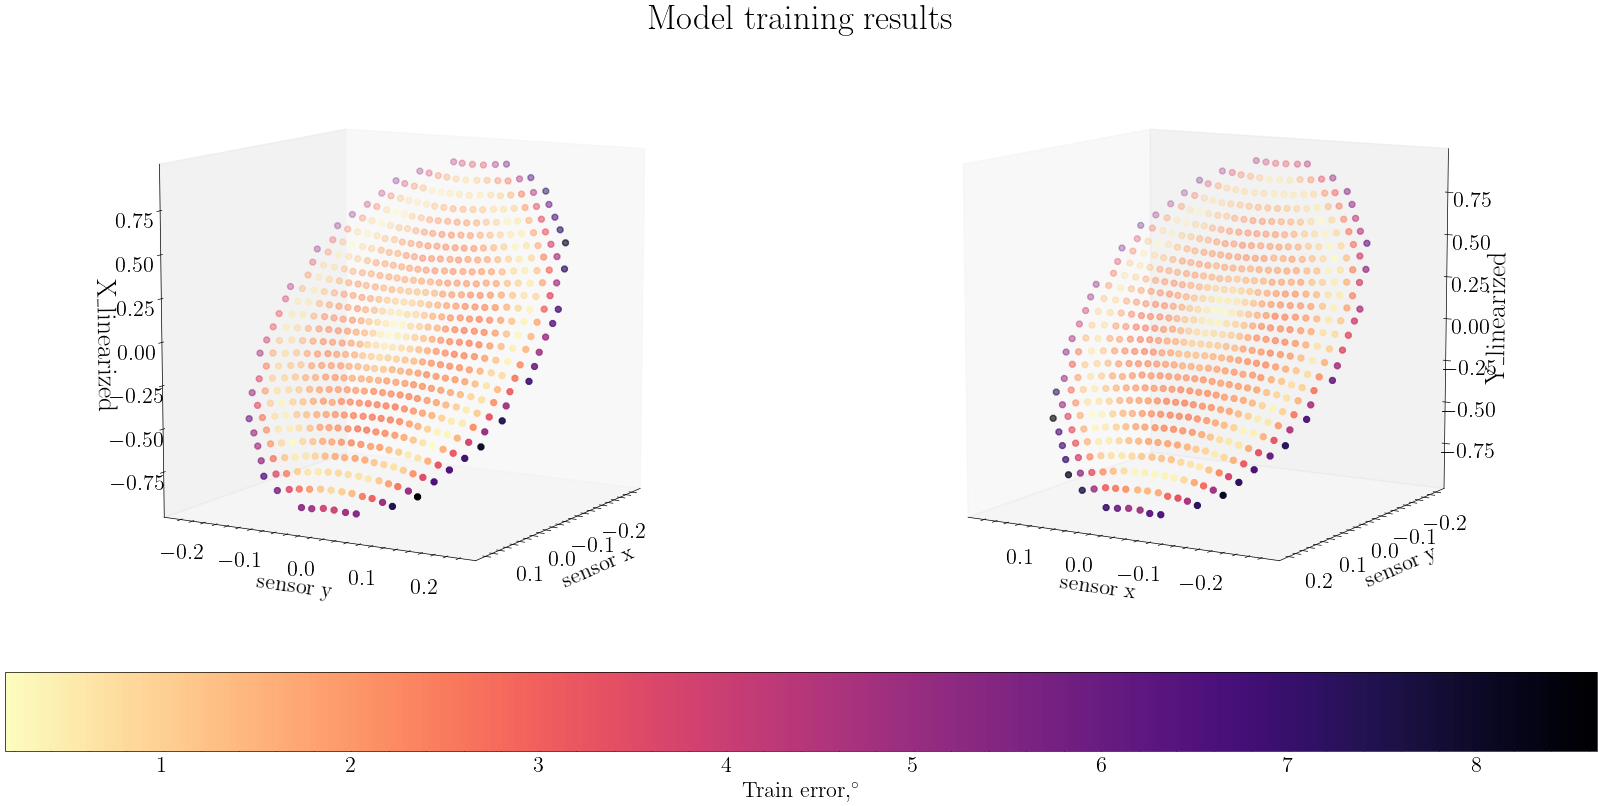

In [ ]:
# Plotter.plot_model_training_results(panels[2],   linear.perform_training(panels[2]), "X_linearized", "Y_linearized")

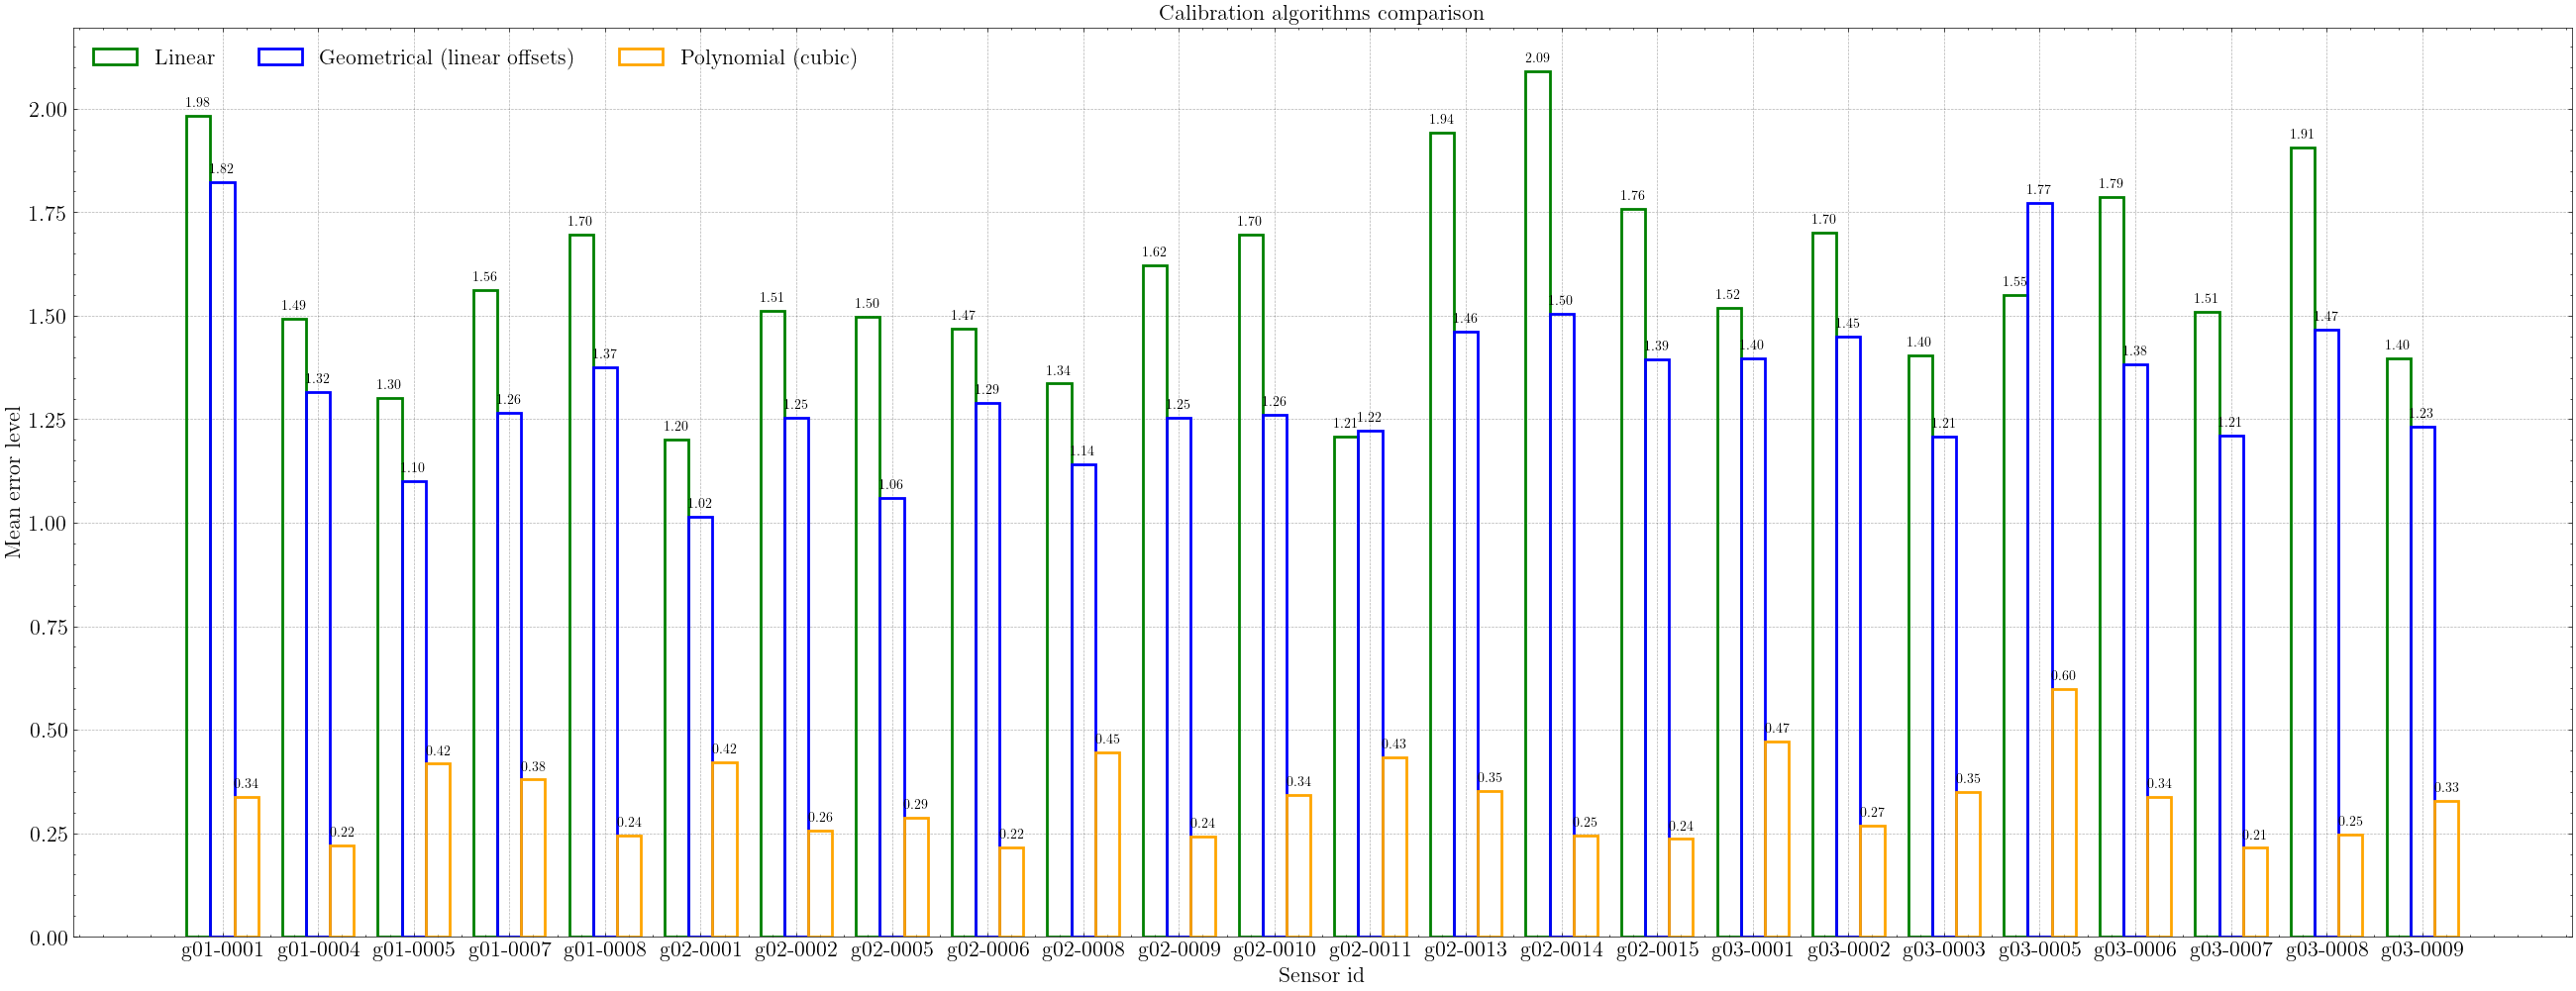

In [ ]:
# names = linear_stats["Panel"].to_list()
# x = np.arange(len(names)) * 2
# width = 0.5
# multiplier = 0
# errors = {"Linear":linear_stats["mean_error_linearized"], "Geometrical (linear offsets)":geom_stats["mean_error_linear_offsets"], "Polynomial (cubic)":poly_stats["mean_error_cube"]}
# colors=["green", 'blue', 'orange']
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(layout='constrained', figsize=(26,10))
# for (calib_type, error_levels), color in zip(errors.items(), colors):
#     offset = width * multiplier
#     rects = ax.bar(x + offset, error_levels, width, label=calib_type, facecolor='none', edgecolor=color, linewidth=2)
#     ax.bar_label(rects, padding=5, fmt="%.2f")
#     multiplier += 1


# ax.set_xlabel("Sensor id")
# ax.set_ylabel("Mean error level")
# ax.set_title("Calibration algorithms comparison")
# ax.set_xticks(x + width, names)
# ax.legend(loc='upper left', ncols=3)
# plt.show()


In [ ]:
# print(linear_stats["mean_error_linearized"].mean(), linear_stats["standart_deviation_linearized"].mean())
# print(geom_stats["mean_error_linear_offsets"].mean(), geom_stats["standart_deviation_linear_offsets"].mean())
# print(poly_stats["mean_error_cube"].mean(), poly_stats["standart_deviation_cube"].mean())

1.5894247499999998 1.2087839583333333
1.3271317083333332 0.8224327916666666
0.3288645416666666 0.22654004166666666


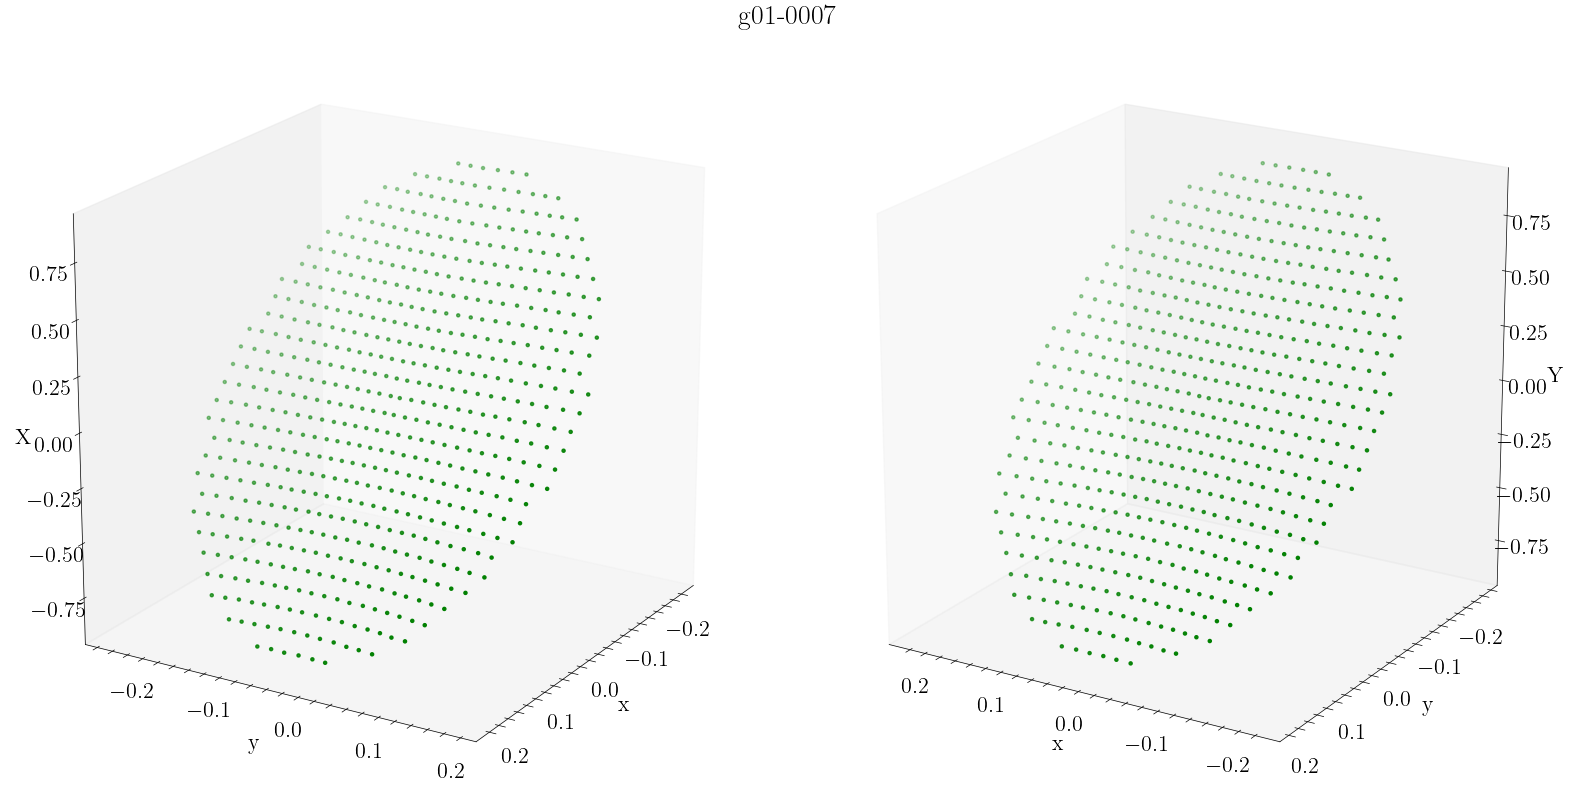

In [ ]:

# Plotter.plot_initial_data(panels[0], "../Pictures/test.gif")

In [ ]:
# poly.stats_dataframe["mean_error_quad"].max()

0.4366120321219872